In [1]:
if __name__=="__main__":
	import sys
	sys.path.append('/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/Scripts')
	
from src.SMT_Analysis_BP.databases.trajectory_analysis_script import *
import matplotlib.pyplot as plt
import os
import numpy as np
from src.SMT_Analysis_BP.helpers.MSD_Utils import *
from src.SMT_Analysis_BP.helpers.plotting_functions import *
from src.SMT_Analysis_BP.helpers.import_functions import *
from src.SMT_Analysis_BP.helpers.Analysis_functions import *
from src.SMT_Analysis_BP.helpers.diff_mw import *
from src.SMT_Analysis_BP.Random.scalebars import *
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')  
import pickle
import src.SMT_Analysis_BP.Parameter_Store.global_params as param_store

/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_33374/2310688594.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
#load the pickle files
rp_ez_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/RPOC_EZ_results.pkl"
rp_m9_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/RPOC_M9_results.pkl"
rp_hex5_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/RPOC_Hex5_results.pkl"

ll_ez_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/LL_EZ_results.pkl"
ll_m9_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/LL_M9_results.pkl"
ll_hex5_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/LL_Hex5_results.pkl"

rp_rif_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/RPOC_Rif_results.pkl"


In [3]:
#load them
with open(rp_ez_pickle,"rb") as f:
    rp_ez_results = pickle.load(f)
with open(rp_m9_pickle,"rb") as f:
    rp_m9_results = pickle.load(f)
with open(rp_hex5_pickle,"rb") as f:
    rp_hex5_results = pickle.load(f)
with open(ll_ez_pickle,"rb") as f:
    ll_ez_results = pickle.load(f)
with open(ll_m9_pickle,"rb") as f:
    ll_m9_results = pickle.load(f)
with open(ll_hex5_pickle,"rb") as f:
    ll_hex5_results = pickle.load(f)
with open(rp_rif_pickle,"rb") as f:
    rp_rif_results = pickle.load(f)


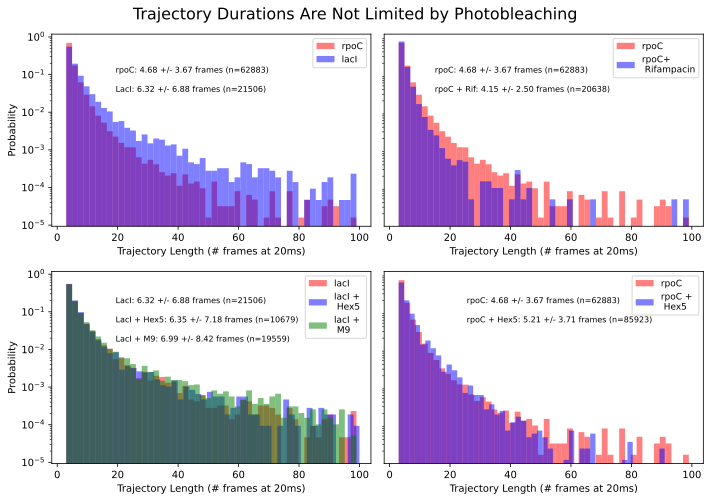

In [10]:
rp_ez_track_lengths = []
for i,j in rp_ez_results.items():
    for name,obj in j.items():
        rp_ez_track_lengths+=obj.track_durations["ALL"]
rp_ez_track_lengths = np.array(rp_ez_track_lengths)
#remove any below 1 
rp_ez_track_lengths = rp_ez_track_lengths[rp_ez_track_lengths>2]

#repeat for ll_ez
ll_ez_track_lengths = []
for i,j in ll_ez_results.items():
    for name,obj in j.items():
        ll_ez_track_lengths+=obj.track_durations["ALL"]
ll_ez_track_lengths = np.array(ll_ez_track_lengths)
#remove any below 1
ll_ez_track_lengths = ll_ez_track_lengths[ll_ez_track_lengths>2]

#repeat this but for rif and rpoc
rp_rif_track_lengths = []
for i,j in rp_rif_results.items():
    for name,obj in j.items():
        rp_rif_track_lengths+=obj.track_durations["ALL"]
rp_rif_track_lengths = np.array(rp_rif_track_lengths)
#remove any below 1
rp_rif_track_lengths = rp_rif_track_lengths[rp_rif_track_lengths>2]


rp_ez_hex_track_lengths = []
for i,j in rp_hex5_results.items():
    for name,obj in j.items():
        rp_ez_hex_track_lengths+=obj.track_durations["ALL"]
rp_ez_hex_track_lengths = np.array(rp_ez_hex_track_lengths)
#remove any below 1
rp_ez_hex_track_lengths = rp_ez_hex_track_lengths[rp_ez_hex_track_lengths>2]


rp_m9_track_lengths = []
for i,j in rp_m9_results.items():
    for name,obj in j.items():
        rp_m9_track_lengths+=obj.track_durations["ALL"]
rp_m9_track_lengths = np.array(rp_m9_track_lengths)
#remove any below 1
rp_m9_track_lengths = rp_m9_track_lengths[rp_m9_track_lengths>2]


ll_m9_track_lengths = []
for i,j in ll_m9_results.items():
    for name,obj in j.items():
        ll_m9_track_lengths+=obj.track_durations["ALL"]
ll_m9_track_lengths = np.array(ll_m9_track_lengths)
#remove any below 1
ll_m9_track_lengths = ll_m9_track_lengths[ll_m9_track_lengths>2]


ll_hex5_track_lengths = []
for i,j in ll_hex5_results.items():
    for name,obj in j.items():
        ll_hex5_track_lengths+=obj.track_durations["ALL"]
ll_hex5_track_lengths = np.array(ll_hex5_track_lengths)
#remove any below 1
ll_hex5_track_lengths = ll_hex5_track_lengths[ll_hex5_track_lengths>2]





#plot the histograms
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(3,2)
ax = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#rp_ez and ll_ez
ax.hist(rp_ez_track_lengths,bins=50,color="red",alpha=0.5,label="rpoC",weights=np.ones_like(rp_ez_track_lengths)/len(rp_ez_track_lengths))
ax.hist(ll_ez_track_lengths,bins=50,color="blue",alpha=0.5,label="lacI",weights=np.ones_like(ll_ez_track_lengths)/len(ll_ez_track_lengths))
#rp_rif and rp_ez
ax1.hist(rp_ez_track_lengths,bins=50,color="red",alpha=0.5,label="rpoC",weights=np.ones_like(rp_ez_track_lengths)/len(rp_ez_track_lengths))
ax1.hist(rp_rif_track_lengths,bins=50,color="blue",alpha=0.5,label="rpoC+ \n Rifampacin",weights=np.ones_like(rp_rif_track_lengths)/len(rp_rif_track_lengths))
#ll_ez and ll_hex5 and ll_m9
ax2.hist(ll_ez_track_lengths,bins=50,color="red",alpha=0.5,label="lacI",weights=np.ones_like(ll_ez_track_lengths)/len(ll_ez_track_lengths))
ax2.hist(ll_hex5_track_lengths,bins=50,color="blue",alpha=0.5,label="lacI + \n Hex5",weights=np.ones_like(ll_hex5_track_lengths)/len(ll_hex5_track_lengths))
ax2.hist(ll_m9_track_lengths,bins=50,color="green",alpha=0.5,label="lacI + \n M9",weights=np.ones_like(ll_m9_track_lengths)/len(ll_m9_track_lengths))
#rp_ez and rp_ez_hex
ax3.hist(rp_ez_track_lengths,bins=50,color="red",alpha=0.5,label="rpoC",weights=np.ones_like(rp_ez_track_lengths)/len(rp_ez_track_lengths))
ax3.hist(rp_ez_hex_track_lengths,bins=50,color="blue",alpha=0.5,label="rpoC + \n Hex5",weights=np.ones_like(rp_ez_hex_track_lengths)/len(rp_ez_hex_track_lengths))




for i in [ax,ax1,ax2,ax3]:
    i.set_xlabel("Trajectory Length (# frames at 20ms)")
    i.set_ylabel("Probability")
    i.set_yscale("log")
    i.legend()
#ax and ax1 share the same y axis and x axis
ax1.set_yticks([])
ax1.set_ylabel("")
ax3.set_yticks([])
ax3.set_ylabel("")

ax3.set_ylim(ax.get_ylim())
ax1.set_ylim(ax.get_ylim())
ax2.set_ylim(ax.get_ylim())
#same for the x axis
ax1.set_xlim(ax.get_xlim())
ax3.set_xlim(ax.get_xlim())
ax2.set_xlim(ax.get_xlim())


#title for the main figure
fig.suptitle("Trajectory Durations Are Not Limited by Photobleaching",fontsize=16)

plt.tight_layout()
#plot the mean and std on the plot alongside the number of tracks used.
ax.text(0.2,0.8,"rpoC: {:.2f} +/- {:.2f} frames (n={})".format(np.mean(rp_ez_track_lengths),np.std(rp_ez_track_lengths),len(rp_ez_track_lengths)),transform=ax.transAxes,fontsize=8)
ax1.text(1.2,0.8,"rpoC: {:.2f} +/- {:.2f} frames (n={})".format(np.mean(rp_ez_track_lengths),np.std(rp_ez_track_lengths),len(rp_ez_track_lengths)),transform=ax.transAxes,fontsize=8)
ax.text(0.2,0.7,"LacI: {:.2f} +/- {:.2f} frames (n={})".format(np.mean(ll_ez_track_lengths),np.std(ll_ez_track_lengths),len(ll_ez_track_lengths)),transform=ax.transAxes,fontsize=8)
ax1.text(1.2,0.7,"rpoC + Rif: {:.2f} +/- {:.2f} frames (n={})".format(np.mean(rp_rif_track_lengths),np.std(rp_rif_track_lengths),len(rp_rif_track_lengths)),transform=ax.transAxes,fontsize=8)

ax2.text(0.2,-0.4,"LacI: {:.2f} +/- {:.2f} frames (n={})".format(np.mean(ll_ez_track_lengths),np.std(ll_ez_track_lengths),len(ll_ez_track_lengths)),transform=ax.transAxes,fontsize=8)
ax2.text(0.2,-0.5,"LacI + Hex5: {:.2f} +/- {:.2f} frames (n={})".format(np.mean(ll_hex5_track_lengths),np.std(ll_hex5_track_lengths),len(ll_hex5_track_lengths)),transform=ax.transAxes,fontsize=8)
ax2.text(0.2,-0.6,"LacI + M9: {:.2f} +/- {:.2f} frames (n={})".format(np.mean(ll_m9_track_lengths),np.std(ll_m9_track_lengths),len(ll_m9_track_lengths)),transform=ax.transAxes,fontsize=8)
ax3.text(1.3,-0.4,"rpoC: {:.2f} +/- {:.2f} frames (n={})".format(np.mean(rp_ez_track_lengths),np.std(rp_ez_track_lengths),len(rp_ez_track_lengths)),transform=ax.transAxes,fontsize=8)
ax3.text(1.3,-0.5,"rpoC + Hex5: {:.2f} +/- {:.2f} frames (n={})".format(np.mean(rp_ez_hex_track_lengths),np.std(rp_ez_hex_track_lengths),len(rp_ez_hex_track_lengths)),transform=ax.transAxes,fontsize=8)

#make the legend smaller 
for i in [ax,ax1,ax2,ax3]:
    i.legend(fontsize=9)
plt.show()